## Loading and Visualizing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import optimize
from scipy.io import loadmat

In [7]:
data = loadmat('ex5data1.mat')

X, y = data['X'], data['y'].ravel()
Xtest, ytest = data['Xtest'], data['ytest'].ravel()
Xval, yval = data['Xval'], data['yval'].ravel()

m = y.size
print(f'Training samples : {X.shape}')
print(f'Training labels : {y.shape}')
print(f'Training samples: \n {X}\n')
print(f'Training labels')

print(f'Test samples : {X.shape}')
print(f'Test labels : {y.shape}')

print(f'Validation samples : {X.shape}')
print(f'Validation labels : {y.shape}')




Training samples : (12, 1)
Training labels : (12,)
Training samples: 
 [[-15.93675813]
 [-29.15297922]
 [ 36.18954863]
 [ 37.49218733]
 [-48.05882945]
 [ -8.94145794]
 [ 15.30779289]
 [-34.70626581]
 [  1.38915437]
 [-44.38375985]
 [  7.01350208]
 [ 22.76274892]]

Training labels
Test samples : (12, 1)
Test labels : (12,)
Validation samples : (12, 1)
Validation labels : (12,)


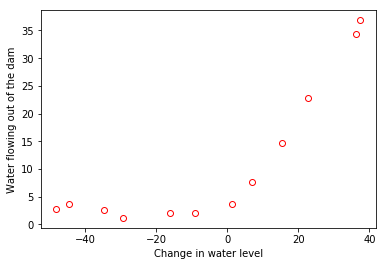

In [3]:
plt.scatter(X.flatten(), y, c='white', edgecolors='red')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.show()

## Regularized Linear Regression Cost and Gradient

In [15]:
def linearRegCostFunction(X, y, theta, lmbda):
    '''Compute cost and gradient for regularized linear regression with multiple variables'''
    
    m = y.size
    
    y = y.reshape(len(y), 1)
    
    grad = np.zeros(theta.shape)
    theta = theta.reshape(len(theta),1)
    J = 1/(2 *m) * np.sum((X.dot(theta) - y) ** 2) + lmbda/(2* m) * np.sum(theta[1:] ** 2)
    grad[0] = (1/m) * np.sum(X.dot(theta) - y)
    grad[1:] = (1/m) * np.sum((X.dot(theta) - y) * X[:, 1:]) + lmbda/m * theta[1:]
    
    grad = grad[:]
    return J, grad.flatten()

In [16]:
theta = np.array([1,1])
X_aug = np.concatenate([np.ones((m,1)), X], axis=1)
(J, grad) = linearRegCostFunction(X_aug, y, theta, 1);

print(f'Cost at theta = [1 ; 1]: {J}\n(this value should be about 303.993192)\n');

print(f'Gradient at theta = [1 ; 1]:  {grad[0], grad[1]} \n(this value should be about [-15.303016; 598.250744])\n')

Cost at theta = [1 ; 1]: 303.9931922202643
(this value should be about 303.993192)

Gradient at theta = [1 ; 1]:  (-15.303015674201186, 598.2507441727035) 
(this value should be about [-15.303016; 598.250744])



## Train Linear Regression

In [17]:
def trainLinearReg(linearRegCostFunction, X, y, lmbda):
    
    # Initialize Theta
    initial_theta = np.zeros(X.shape[1])

    # Create "short hand" for the cost function to be minimized
    costFunction = lambda t: linearRegCostFunction(X, y, t, lmbda)

    # Now, costFunction is a function that takes in only one argument
    options = {'maxiter': 200}

    # Minimize using scipy
    res = optimize.minimize(costFunction, initial_theta, jac=True, method='TNC', options=options)
    return res.x, res.fun

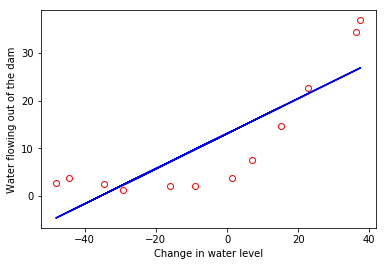

In [20]:
lmbda = 0
theta, j= trainLinearReg(linearRegCostFunction, X_aug, y, lmbda)

plt.scatter(X.flatten(), y, c='white', edgecolors='red')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.plot(X, X_aug.dot(theta), 'b')
plt.show()

